# Woche 8: Data Visualization - Übung am eigenen Projekt

**Ziel dieser Übung:** Nachdem Sie die wichtigsten Visualisierungstechniken kennengelernt haben, wenden Sie dieses Wissen Schritt für Schritt auf Ihren eigenen bereinigten Datensatz an.

**Arbeitsweise:**
- Arbeiten Sie die Aufgaben nacheinander durch
- Nutzen Sie die Code-Zellen für Ihre Implementierung
- Orientieren Sie sich an den Beispielen aus dem Airbnb-Notebook
- Erstellen Sie aussagekräftige Visualisierungen für Ihre Forschungsfrage
- Speichern Sie wichtige Visualisierungen als Bilddateien

---
## 1. Bibliotheken importieren und Daten einlesen

**Aufgabe:** Importieren Sie die notwendigen Bibliotheken und laden Sie Ihren bereinigten Datensatz aus Woche 7.

**Hinweise:**
- Importieren Sie: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, `plotly.express`, `plotly.graph_objects`
- Konfigurieren Sie die Visualisierungsstile
- Laden Sie Ihren bereinigten CSV-Datensatz

In [2]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Visualisierungsstile konfigurieren
# sns.set_style('whitegrid')
# plt.rcParams['figure.figsize'] = (10, 6)

# Bereinigten Datensatz einlesen
df = pd.read_csv('data/economy_rounds_cleaned.csv')


---
## 2. Ersten Überblick verschaffen

**Aufgabe:** Verschaffen Sie sich einen Überblick über Ihren bereinigten Datensatz.

**Was Sie prüfen sollten:**
- Dimensionen des Datensatzes
- Datentypen der Spalten
- Statistische Kennzahlen
- Erste Zeilen anzeigen

In [ ]:
# Dimensionen
df.shape

# Erste Zeilen
df.head()

# Informationen zu Spalten
df.info()

# Statistische Übersicht
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095217 entries, 0 to 1095216
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   match_id        1095217 non-null  int64 
 1   map             1095217 non-null  object
 2   round           1095217 non-null  int64 
 3   team1_equip     1095217 non-null  int64 
 4   team2_equip     1095217 non-null  int64 
 5   equipment_diff  1095217 non-null  int64 
 6   team1_side      1095217 non-null  object
 7   team2_side      1095217 non-null  object
 8   winner          1095217 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 75.2+ MB


,match_id,round,team1_equip,team2_equip,equipment_diff,winner
count,1.095217e+06,1.095217e+06,1.095217e+06,1.095217e+06,1.095217e+06,1.095217e+06
mean,2.326468e+06,1.344063e+01,2.005548e+04,1.967178e+04,3.837069e+02,1.484524e+00
std,8.245465e+03,7.745138e+00,9.608588e+03,9.663819e+03,1.302240e+04,4.997607e-01
min,2.309259e+06,1.000000e+00,0.000000e+00,0.000000e+00,-3.755000e+04,1.000000e+00
25%,2.319425e+06,7.000000e+00,1.180000e+04,1.045000e+04,-7.250000e+03,1.000000e+00
50%,2.326715e+06,1.300000e+01,2.360000e+04,2.325000e+04,1.000000e+02,1.000000e+00
75%,2.333707e+06,2.000000e+01,2.705000e+04,2.685000e+04,8.200000e+03,2.000000e+00
max,2.339873e+06,3.000000e+01,6.325000e+04,5.300000e+04,4.460000e+04,2.000000e+00


---
## 3. Univariate Analysen - Verteilungen einzelner Variablen

**Aufgabe:** Visualisieren Sie die Verteilung einzelner Variablen.

**Für numerische Variablen:**
- Histogramme
- Boxplots
- Violin Plots
- Density Plots

**Für kategoriale Variablen:**
- Bar Charts
- Count Plots
- Pie Charts (bei wenigen Kategorien)

In [3]:
# Numerische Spalten identifizieren
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerische Spalten: {list(numeric_cols)}")


Numerische Spalten: ['match_id', 'round', 'team1_equip', 'team2_equip', 'equipment_diff', 'winner']


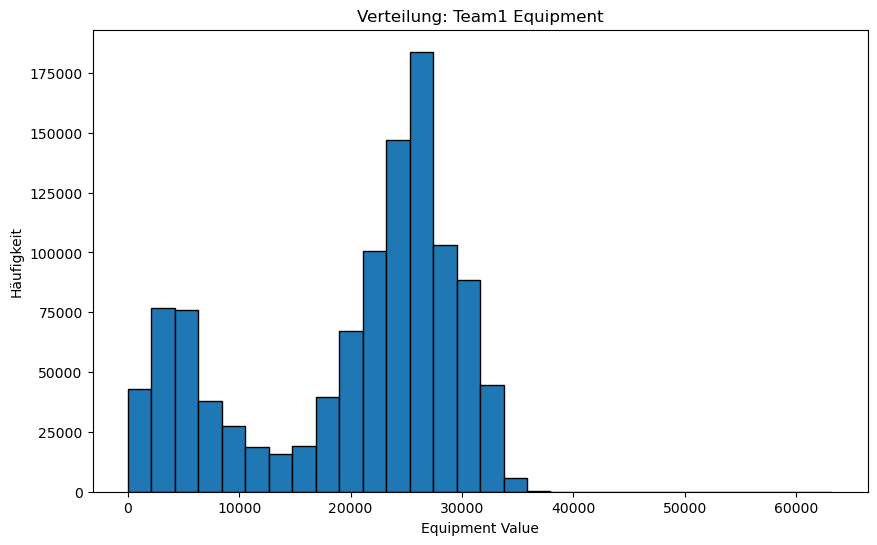

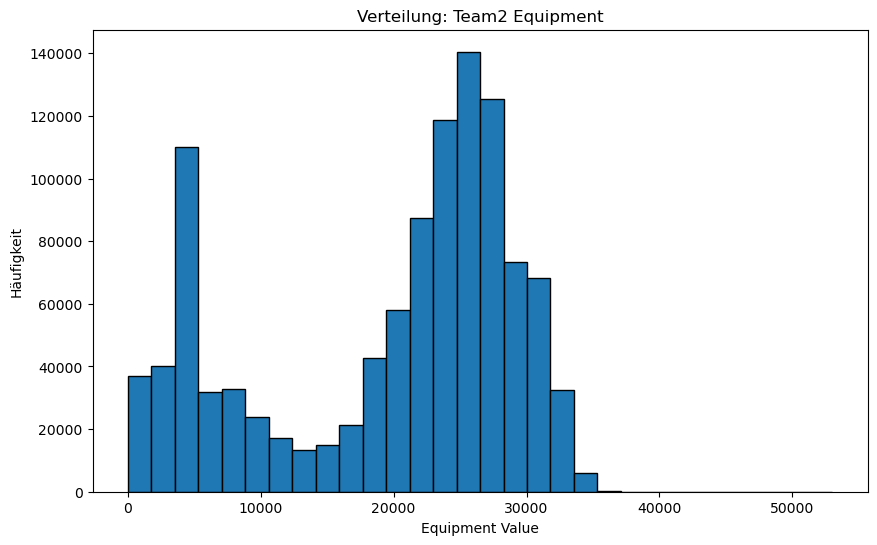

In [ ]:
# Histogramm: Team1 Equipment
plt.figure(figsize=(10, 6))
plt.hist(df['team1_equip'], bins=30, edgecolor='black')
plt.title('Verteilung: Team1 Equipment')
plt.xlabel('Equipment Value')
plt.ylabel('Häufigkeit')
plt.show()

# Histogramm: Team2 Equipment
plt.figure(figsize=(10, 6))
plt.hist(df['team2_equip'], bins=30, edgecolor='black')
plt.title('Verteilung: Team2 Equipment')
plt.xlabel('Equipment Value')
plt.ylabel('Häufigkeit')
plt.show()

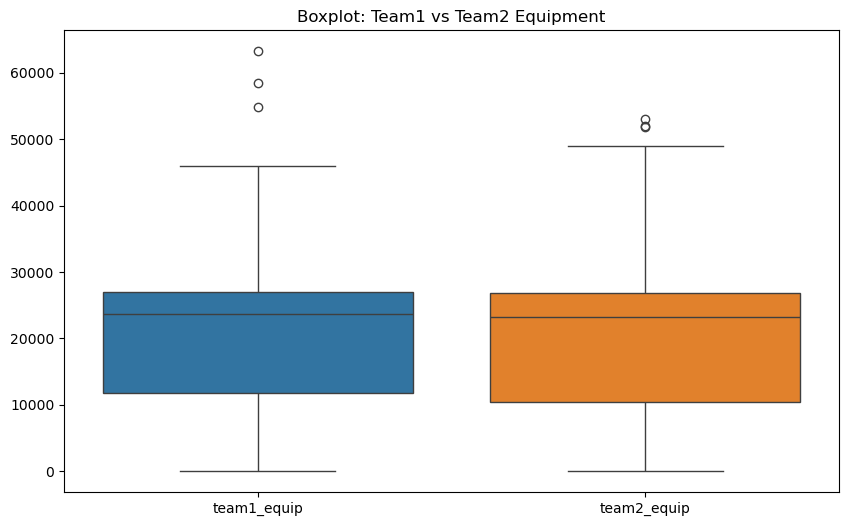

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['team1_equip','team2_equip']])
plt.title('Boxplot: Team1 vs Team2 Equipment')
plt.show()

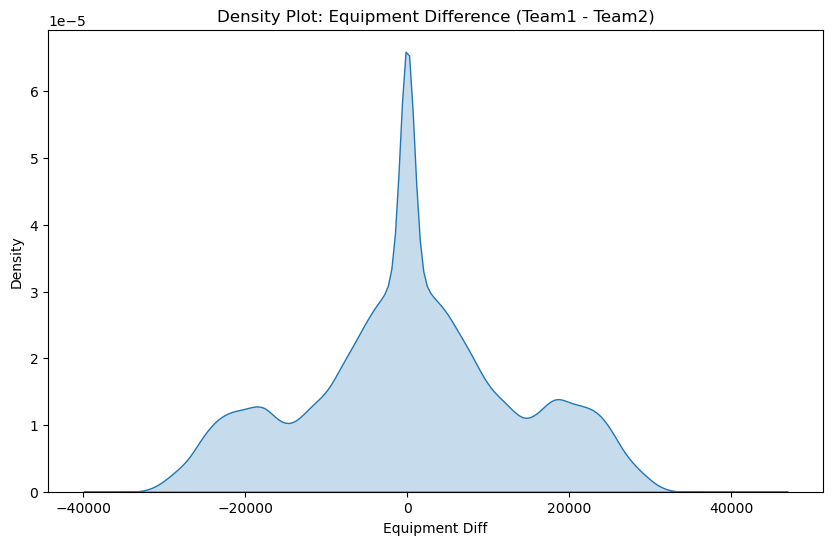

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['equipment_diff'], fill=True)
plt.title('Density Plot: Equipment Difference (Team1 - Team2)')
plt.xlabel('Equipment Diff')
plt.show()

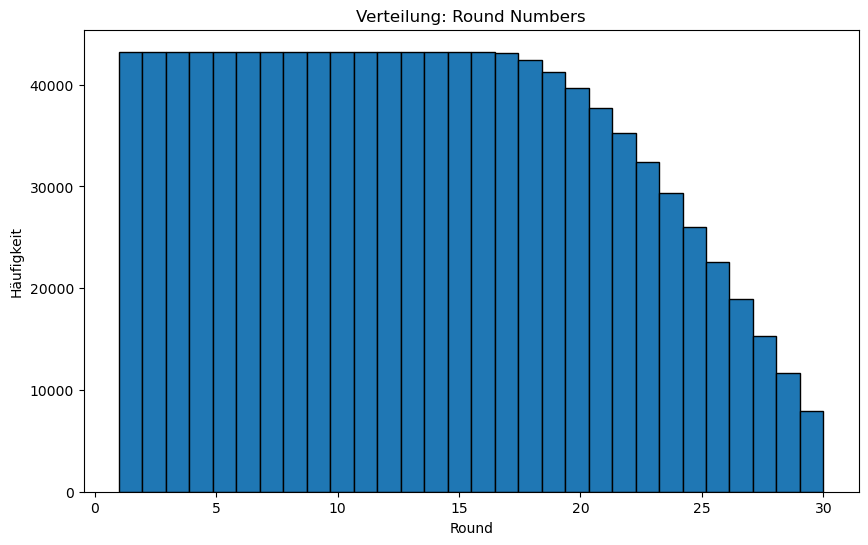

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['round'], bins=30, edgecolor='black')
plt.title('Verteilung: Round Numbers')
plt.xlabel('Round')
plt.ylabel('Häufigkeit')
plt.show()

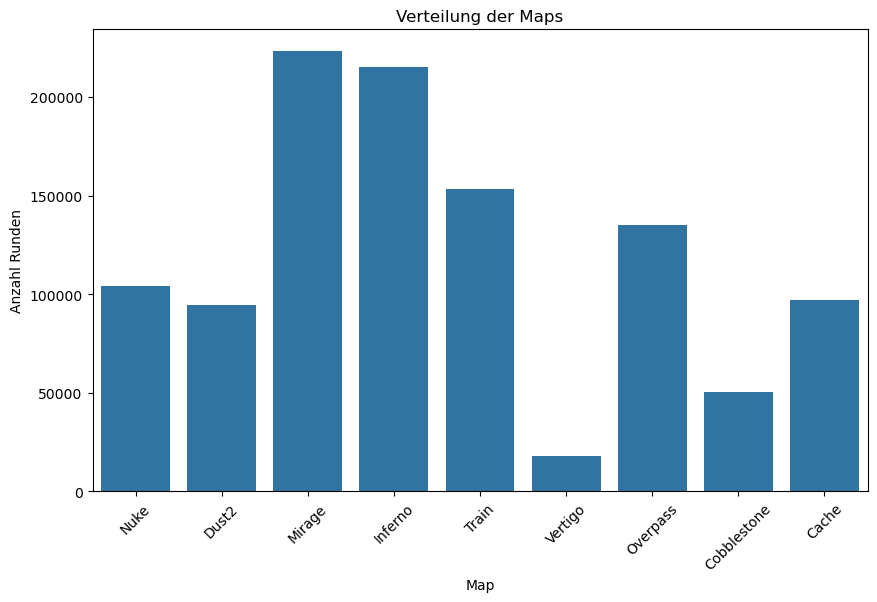

In [ ]:
filtered_df = df[~df['map'].str.lower().eq('default')]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='map')
plt.title('Verteilung der Maps')
plt.xlabel('Map')
plt.ylabel('Anzahl Runden')
plt.xticks(rotation=45)
plt.show()

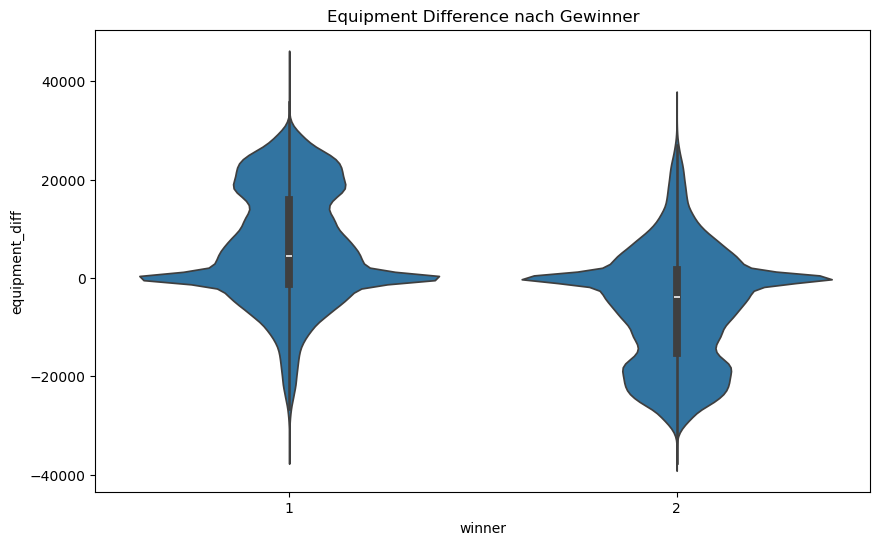

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='winner', y='equipment_diff')
plt.title('Equipment Difference nach Gewinner')
plt.show()

---
## 4. Bivariate Analysen - Beziehungen zwischen zwei Variablen

**Aufgabe:** Untersuchen Sie Beziehungen zwischen zwei Variablen.

**Mögliche Visualisierungen:**
- Scatter Plots (numerisch vs. numerisch)
- Line Plots (bei Zeitreihen)
- Grouped Bar Charts (kategorial vs. numerisch)
- Box Plots nach Kategorien (kategorial vs. numerisch)
- Violin Plots nach Kategorien

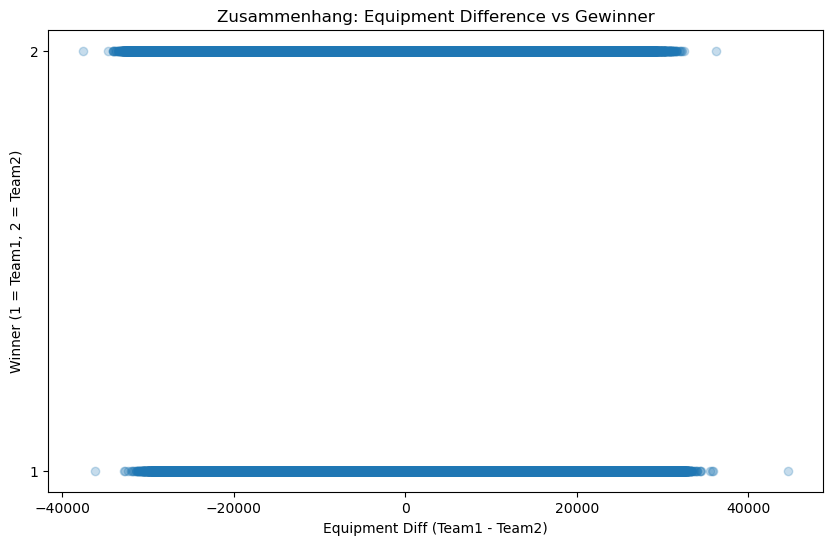

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['equipment_diff'], df['winner'], alpha=0.25)
plt.title('Zusammenhang: Equipment Difference vs Gewinner')
plt.xlabel('Equipment Diff (Team1 - Team2)')
plt.ylabel('Winner (1 = Team1, 2 = Team2)')
plt.yticks([1, 2])
plt.show()

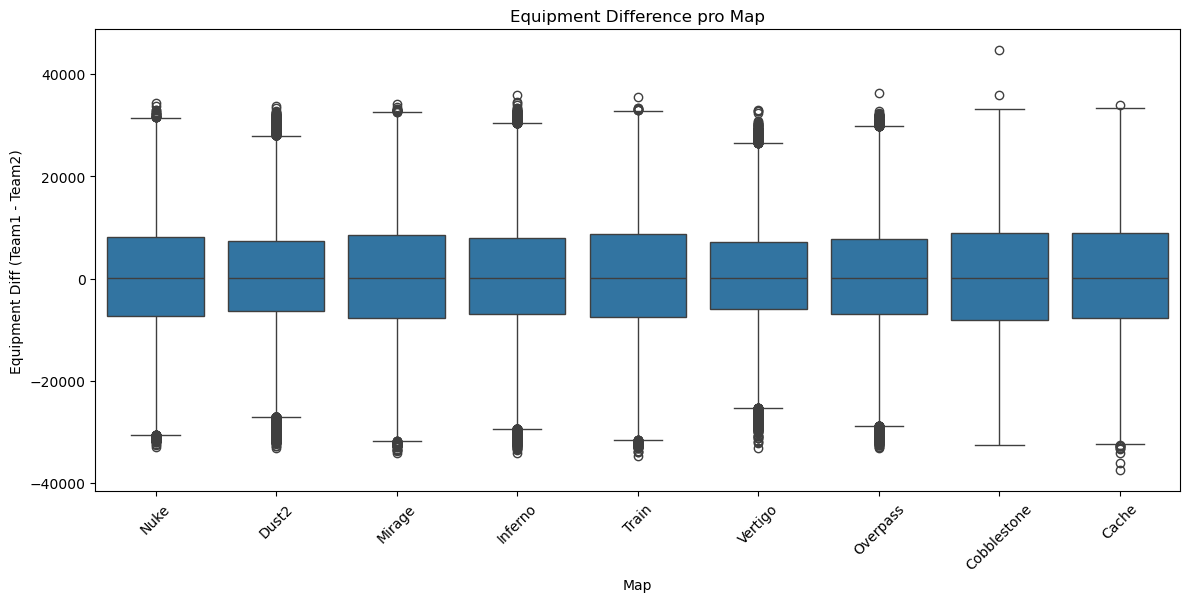

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df[df['map'] != 'Default'], 
    x='map', 
    y='equipment_diff'
)
plt.title('Equipment Difference pro Map')
plt.xlabel('Map')
plt.ylabel('Equipment Diff (Team1 - Team2)')
plt.xticks(rotation=45)
plt.show()

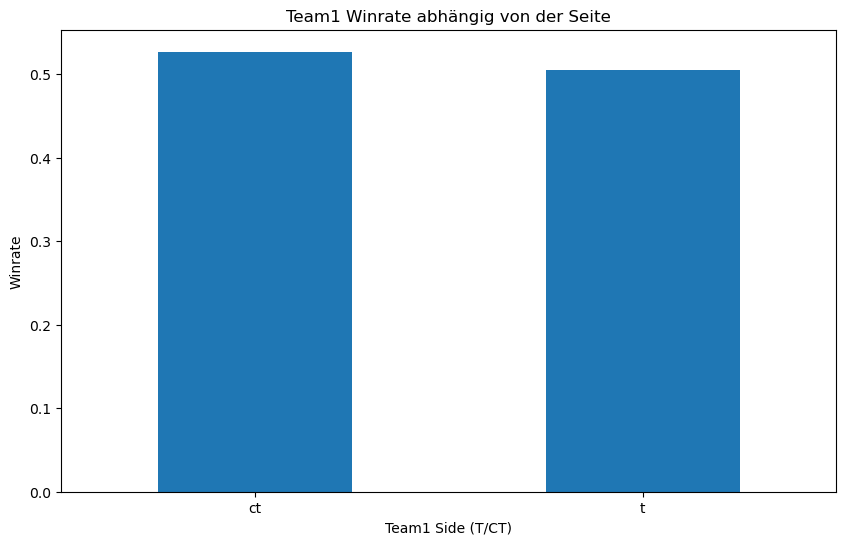

In [ ]:
# Winrate pro Seite (für Team1)
side_winrate = df.groupby('team1_side')['winner'].apply(lambda x: (x == 1).mean())

plt.figure(figsize=(10, 6))
side_winrate.plot(kind='bar')
plt.title('Team1 Winrate abhängig von der Seite')
plt.xlabel('Team1 Side (T/CT)')
plt.ylabel('Winrate')
plt.xticks(rotation=0)
plt.show()

---
## 5. Korrelationsanalyse

**Aufgabe:** Untersuchen Sie Korrelationen zwischen numerischen Variablen.

**Visualisierungen:**
- Korrelationsmatrix als Heatmap
- Pairplot für ausgewählte Variablen

**Hinweis:** Korrelationen zeigen nur lineare Beziehungen!

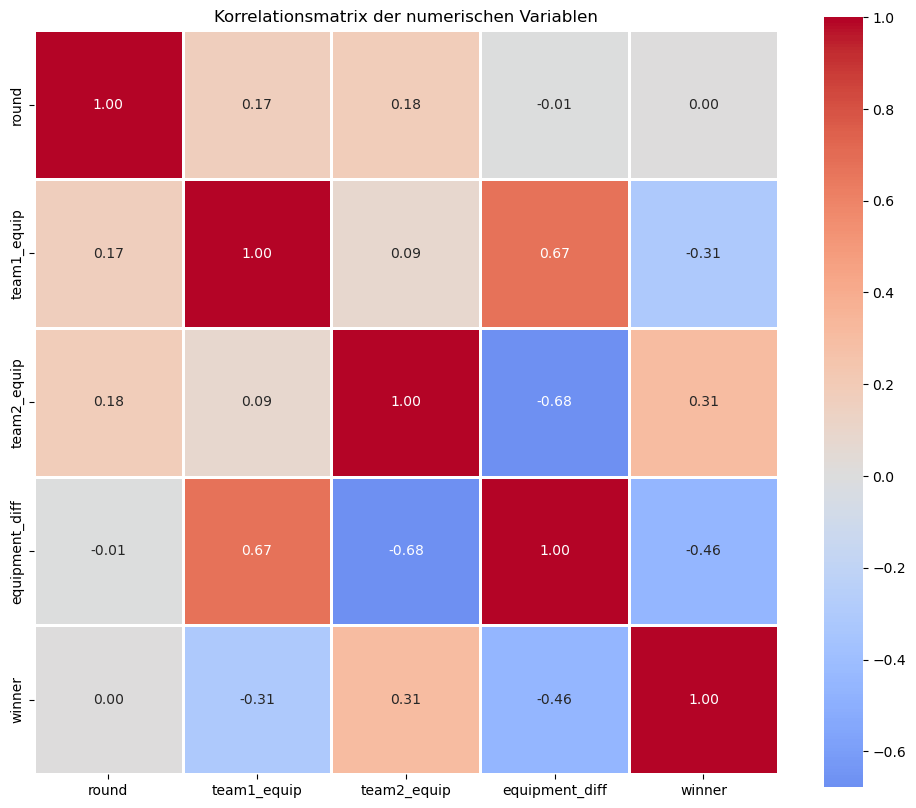

In [ ]:
# Numerische Spalten definieren
numeric_cols = ['round', 'team1_equip', 'team2_equip', 'equipment_diff', 'winner']
correlation_matrix = df[numeric_cols].corr()

# Heatmap der Korrelationen
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1, fmt='.2f')
plt.title('Korrelationsmatrix der numerischen Variablen')
plt.show()

---
## 6. Multivariate Analysen

**Aufgabe:** Visualisieren Sie Beziehungen zwischen mehreren Variablen gleichzeitig.

**Mögliche Visualisierungen:**
- Scatter Plots mit Farb- oder Größenkodierung
- Facet Grids (mehrere Subplots)
- Stacked Bar Charts
- Bubble Charts

/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


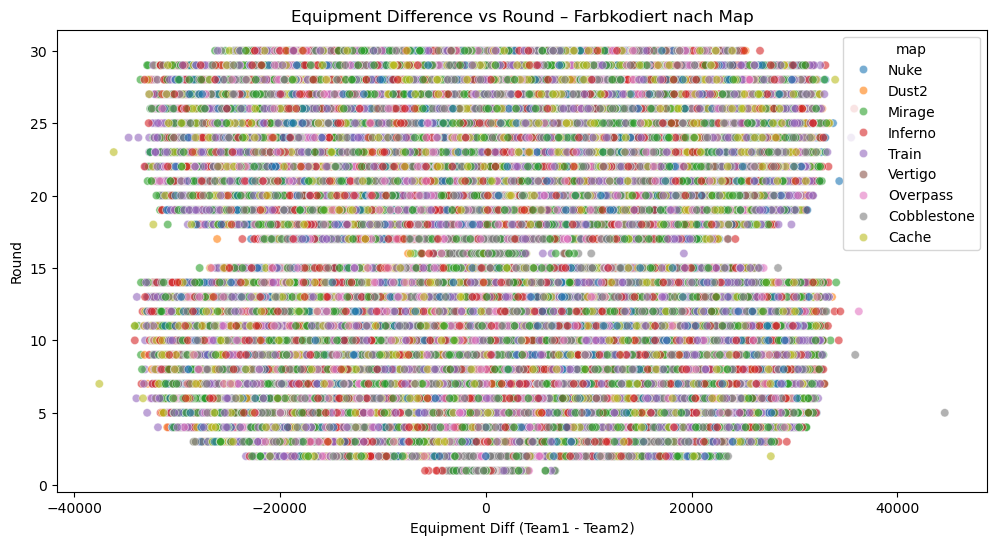

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df[df['map'] != 'Default'],
    x='equipment_diff',
    y='round',
    hue='map',
    alpha=0.6
)
plt.title('Equipment Difference vs Round – Farbkodiert nach Map')
plt.xlabel('Equipment Diff (Team1 - Team2)')
plt.ylabel('Round')
plt.show()

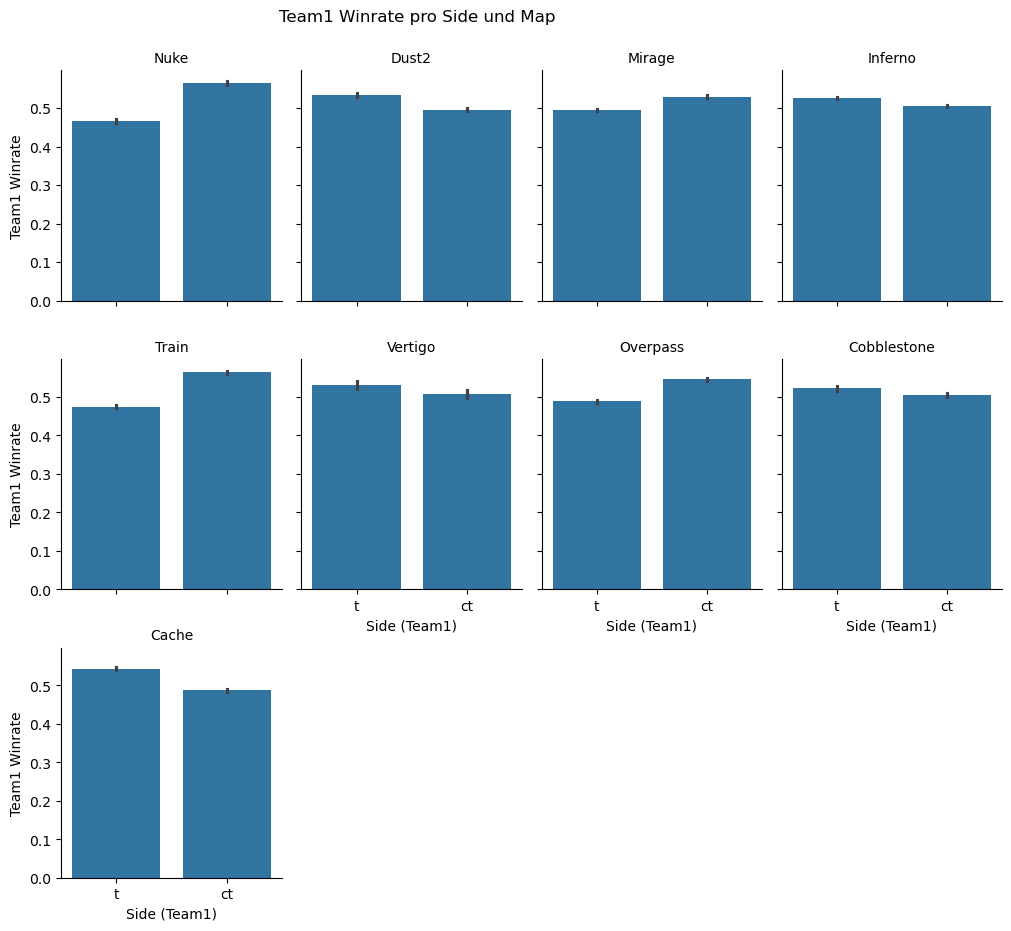

In [ ]:
g = sns.FacetGrid(df[df['map'] != 'Default'], col='map', col_wrap=4, height=3, aspect=1)
g.map_dataframe(
    sns.barplot,
    x='team1_side',
    y=(df['winner'] == 1).astype(int)
)
g.set_axis_labels("Side (Team1)", "Team1 Winrate")
g.set_titles("{col_name}")
plt.suptitle("Team1 Winrate pro Side und Map", y=1.03)
plt.show()

---
## 7. Interaktive Visualisierungen mit Plotly (Bonus!)

**Aufgabe:** Erstellen Sie interaktive Visualisierungen mit Plotly.

**Vorteile von interaktiven Plots:**
- Zoom- und Pan-Funktionen
- Hover-Informationen
- Dynamische Filter
- Bessere Exploration komplexer Daten

**Hinweis:** Diese Plots sind besonders nützlich für Ihre Streamlit-App!

In [ ]:
# Optional: Interaktive Korrelationsmatrix
# fig = px.imshow(correlation_matrix,
#                 text_auto=True,
#                 color_continuous_scale='RdBu_r',
#                 title='Interaktive Korrelationsmatrix')
# fig.show()


---
## 8. Visualisierungen für Ihre Forschungsfrage

**Aufgabe:** Nachdem Sie in den Aufgaben 1-7 "experimentiert" haben, erstellen Sie jetzt spezifische Visualisierungen, die Ihre Forschungsfrage beantworten.

**Überlegen Sie:**
- Welche Variablen sind für Ihre Forschungsfrage am wichtigsten?
- Welche Visualisierungen zeigen die relevanten Muster am besten?
- Welche Insights können Sie aus den Daten gewinnen?

**Erstellen Sie mindestens 3 aussagekräftige Visualisierungen!**

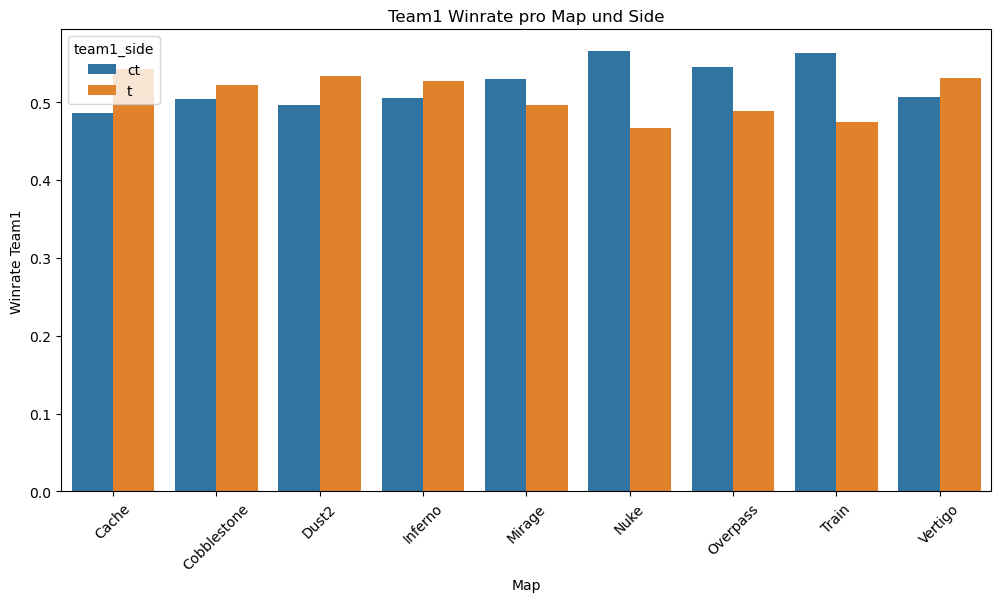

In [21]:
# Visualisierung 1: [Welche Karten sind CT oder T-lastig?]

map_side_winrate = df[df['map'] != 'Default'].groupby(['map', 'team1_side'])['winner'].apply(lambda x: (x == 1).mean()).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=map_side_winrate, x='map', y='winner', hue='team1_side')
plt.title('Team1 Winrate pro Map und Side')
plt.xlabel('Map')
plt.ylabel('Winrate Team1')
plt.xticks(rotation=45)
plt.savefig('map_side_winrate.png', dpi=300, bbox_inches='tight')
plt.show()


**Interpretation Visualisierung 1:**
- ...

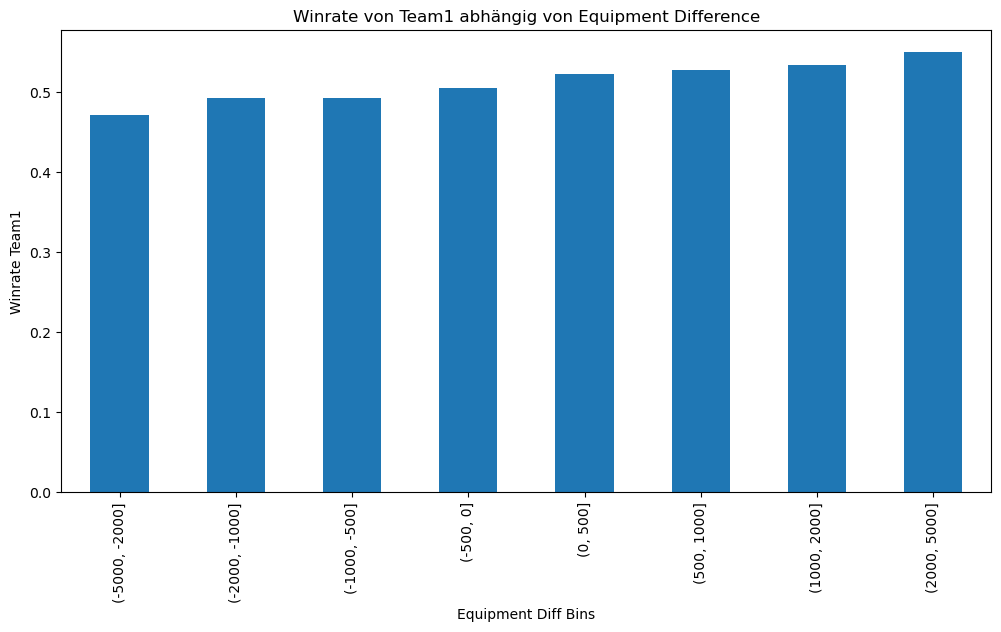

In [ ]:
# Visualisierung 2: [Wie stark beeinflusst Ökonomie den Runden-Ausgang?]

df['t1_win'] = (df['winner'] == 1).astype(int)
bins = [-5000, -2000, -1000, -500, 0, 500, 1000, 2000, 5000]
df['equip_bin'] = pd.cut(df['equipment_diff'], bins=bins)

bin_winrate = df.groupby('equip_bin', observed=False)['t1_win'].mean()

plt.figure(figsize=(12, 6))
bin_winrate.plot(kind='bar')
plt.title('Winrate von Team1 abhängig von Equipment Difference')
plt.xlabel('Equipment Diff Bins')
plt.ylabel('Winrate Team1')
plt.savefig('bin_winrate.png', dpi=300, bbox_inches='tight')
plt.show()

**Interpretation Visualisierung 2:**
- ...

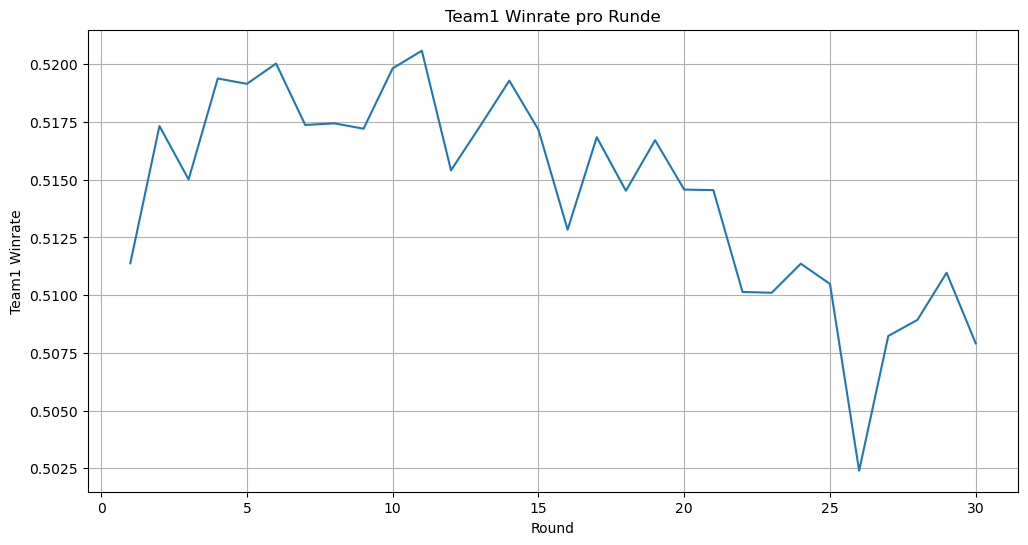

In [12]:
# Visualisierung 3: [Gibt es Match-Phasen, die "Seitenlastig" sind?]

round_winrate = df.groupby('round')['t1_win'].mean()

plt.figure(figsize=(12, 6))
round_winrate.plot()
plt.title('Team1 Winrate pro Runde')
plt.xlabel('Round')
plt.ylabel('Team1 Winrate')
plt.grid(True)
plt.savefig('round_winrate.png', dpi=300, bbox_inches='tight')
plt.show()

**Interpretation Visualisierung 3:**
- ...

In [ ]:
# Weitere Visualisierungen nach Bedarf




---
## 9. Visualisierungen speichern

**Aufgabe:** Speichern Sie Ihre wichtigsten Visualisierungen als Bilddateien.

**Hinweise:**
- Speichern Sie Plots in hoher Qualität (dpi=300)
- Verwenden Sie aussagekräftige Dateinamen
- Diese Bilder können Sie in Präsentationen oder Berichten verwenden
- Für Streamlit: Visualisierungen werden direkt im Code erstellt, nicht als Bilder eingebunden

In [ ]:
# Beispiel: Matplotlib/Seaborn Plot speichern
# plt.figure(figsize=(10, 6))
# # ... Ihr Plot-Code ...
# plt.savefig('plot_name.png', dpi=300, bbox_inches='tight')
# plt.show()

#!!!!!!!!!!!HABE ALLE PLOTS JEWEILS IN DER ZELLE OBEN GESPEICHERT!!!!!!!!!!!!!


In [25]:
# Beispiel: Plotly Plot als HTML speichern (für interaktive Nutzung)
# fig = px.scatter(...)  # Ihr Plotly Plot
# fig.write_html('interactive_plot.html')


---
## 10. Qualitätskontrolle durch Visualisierung

**Aufgabe:** Nutzen Sie Visualisierungen zur Qualitätskontrolle Ihrer Daten.

**Prüfen Sie:**
- Sind alle Ausreißer sinnvoll?
- Gibt es unerwartete Muster?
- Sind kategoriale Variablen konsistent kodiert?
- Gibt es offensichtliche Datenfehler?

**Falls Sie Probleme entdecken:** Gehen Sie zurück zu Ihrem Data Cleaning Notebook und korrigieren Sie diese!

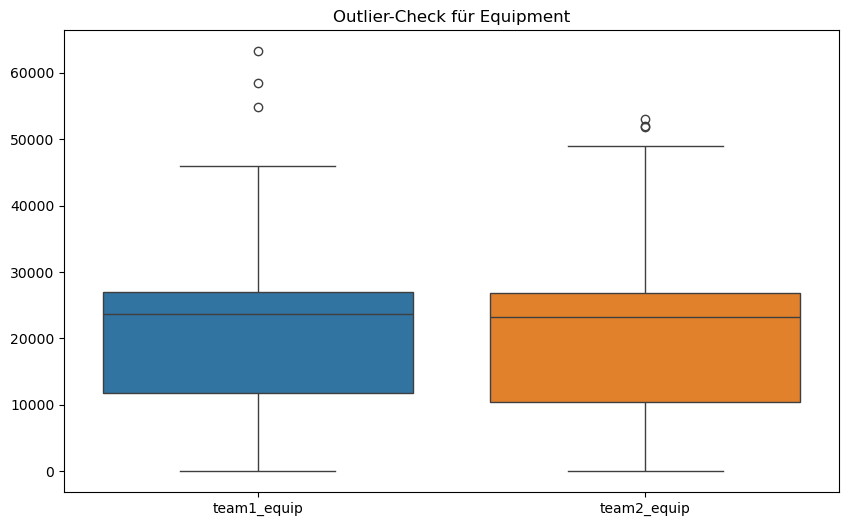

Maps: ['Nuke' 'Dust2' 'Mirage' 'Inferno' 'Train' 'Default' 'Vertigo' 'Overpass'
 'Cobblestone' 'Cache']
Sides: ['t' 'ct']


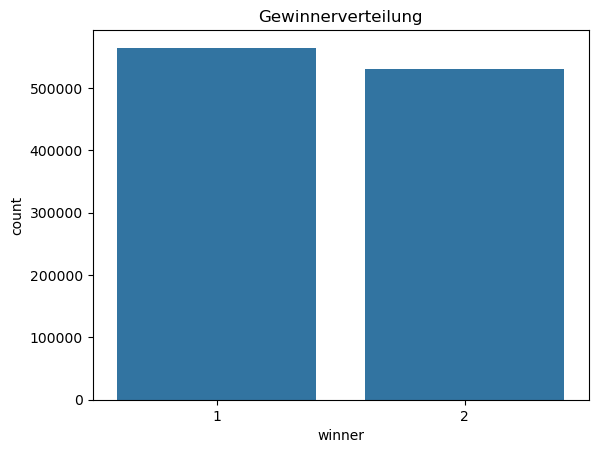

In [9]:
# Qualitätskontrolle: Überprüfen Sie Ihre Daten visuell

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['team1_equip', 'team2_equip']])
plt.title('Outlier-Check für Equipment')
plt.show()

print("Maps:", df['map'].unique())

print("Sides:", df['team1_side'].unique())

sns.countplot(data=df, x='winner')
plt.title('Gewinnerverteilung')
plt.show()


**Beobachtungen aus der Qualitätskontrolle:**
- ...

---
## Reflexion

**Dokumentieren Sie Ihre Arbeit:**

Beantworten Sie folgende Fragen:

1. Welche Visualisierungen waren am aufschlussreichsten für Ihre Forschungsfrage?
2. Welche unerwarteten Muster oder Erkenntnisse haben Sie entdeckt?
3. Welche Visualisierungstypen eignen sich am besten für Ihren Datensatz?
4. Welche Visualisierungen planen Sie für Ihre Streamlit-App zu verwenden?
5. Gab es Herausforderungen bei der Visualisierung? Wie haben Sie diese gelöst?
6. Haben die Visualisierungen neue Fragen aufgeworfen oder Ideen für weitere Analysen gegeben?

### Ihre Reflexion:

1. **Aufschlussreichste Visualisierungen:**
   - ...

2. **Unerwartete Erkenntnisse:**
   - ...

3. **Geeignetste Visualisierungstypen:**
   - ...

4. **Geplante Visualisierungen für Streamlit:**
   - ...

5. **Herausforderungen und Lösungen:**
   - ...

6. **Neue Fragen und Ideen:**
   - ...

---
## Zusammenfassung und nächste Schritte

**Sie haben in dieser Übung:**
- ✅ Verschiedene Visualisierungstypen auf Ihre Daten angewendet
- ✅ Univariate, bivariate und multivariate Analysen durchgeführt
- ✅ Interaktive Visualisierungen mit Plotly erstellt
- ✅ Spezifische Visualisierungen für Ihre Forschungsfrage entwickelt
- ✅ Ihre Datenqualität visuell überprüft

**Nächste Woche (Woche 9):**
- Machine Learning Grundlagen
- Erste ML-Modelle auf Ihren Daten trainieren
- Modell-Evaluation

**Tipp:** Speichern Sie dieses Notebook gut ab - die Visualisierungen bilden die Grundlage für Ihre Streamlit-App in Woche 10 und 11!